In [1]:
import numpy as np

# Generate synthetic data with a nice relationship
np.random.seed(42)  # For reproducibility

# Let's create a dataset that spirals in 5D space
n_points = 1000
t = np.linspace(0, 4 * np.pi, n_points)  # Parameter that controls the spiral
noise = np.random.randn(n_points, 6) * 0.02  # Add some noise

# Define the 5D spiral
data = np.array([
    np.sin(t) + noise[:, 0],  # x = sin(t) + noise
    np.cos(t) + noise[:, 1],  # y = cos(t) + noise
    np.sin(10 * t) + noise[:, 2],  # z = sin(2t) + noise
    np.sin(10 * t) + noise[:, 3],  # w = cos(2t) + noise
    t / (4 * np.pi) + noise[:, 4],  # v = linear + noise
    noise[:, 5] * 0.01,  # pure noise
]).T  # Transpose to get shape (n_points, 6)

data.shape


(1000, 6)

Calculating PHATE...
  Running PHATE on 1000 observations and 6 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
  Calculated graph and diffusion operator in 0.03 seconds.
  Calculating optimal t...
    Automatically selected t = 21
  Calculated optimal t in 0.82 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.31 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 1.23 seconds.
Calculated PHATE in 2.41 seconds.


/tmp/ipykernel_217276/2664359661.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data_phate[:, 0], data_phate[:, 1], cmap='Spectral', alpha=0.6)


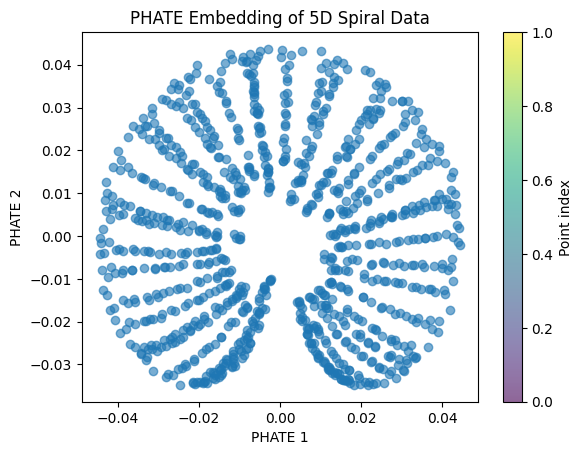

In [2]:
import phate
import matplotlib.pyplot as plt

# Initialize the PHATE operator
phate_op = phate.PHATE()

# Fit and transform the data
data_phate = phate_op.fit_transform(data)

# Plotting the PHATE result
plt.scatter(data_phate[:, 0], data_phate[:, 1], cmap='Spectral', alpha=0.6)
plt.title('PHATE Embedding of 5D Spiral Data')
plt.xlabel('PHATE 1')
plt.ylabel('PHATE 2')
plt.colorbar(label='Point index')
plt.show()


/tmp/ipykernel_217276/3219521160.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data_tsne[:, 0], data_tsne[:, 1], cmap='Spectral', alpha=0.6)


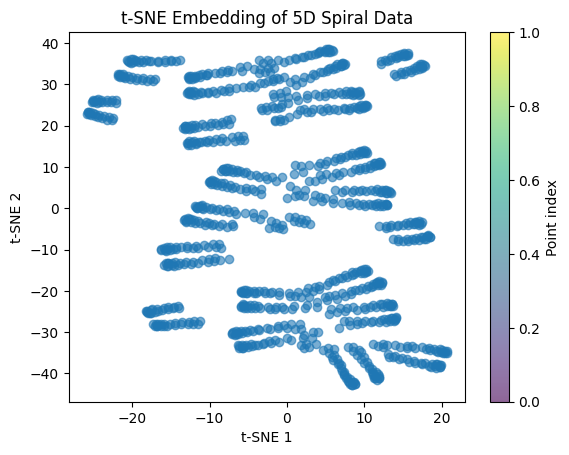

In [3]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Initialize t-SNE
tsne = TSNE(n_components=2, random_state=42)

# Fit and transform the data to 2D
data_tsne = tsne.fit_transform(data)

# Plotting the t-SNE result
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], cmap='Spectral', alpha=0.6)
plt.title('t-SNE Embedding of 5D Spiral Data')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.colorbar(label='Point index')
plt.show()


/home/ubuntu/taker/.venv/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/tmp/ipykernel_217276/4045066420.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data_umap[:, 0], data_umap[:, 1], cmap='Spectral', alpha=0.6)


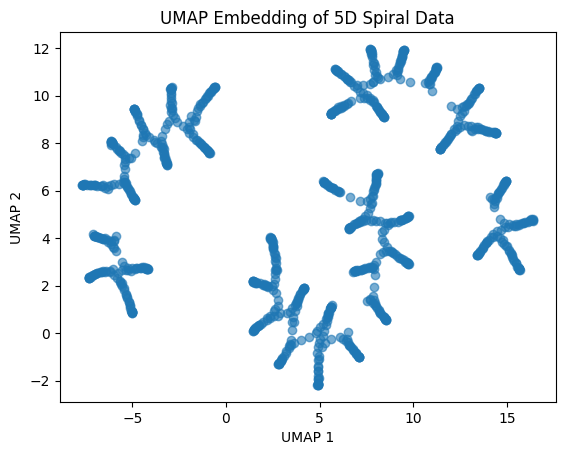

In [4]:
import umap
import matplotlib.pyplot as plt

# Initialize UMAP
reducer = umap.UMAP(random_state=42)

# Fit and transform the data to 2D
data_umap = reducer.fit_transform(data)

# Plotting
plt.scatter(data_umap[:, 0], data_umap[:, 1], cmap='Spectral', alpha=0.6)
plt.title('UMAP Embedding of 5D Spiral Data')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()


/tmp/ipykernel_217276/1729422577.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data_pca[:, 0], data_pca[:, 1], cmap='Spectral', alpha=0.6)


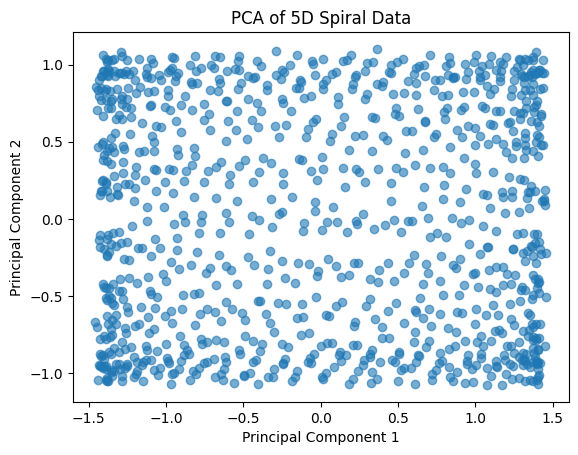

In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Initialize PCA
pca = PCA(n_components=2)

# Fit and transform the data to 2D
data_pca = pca.fit_transform(data)

# Plotting
plt.scatter(data_pca[:, 0], data_pca[:, 1], cmap='Spectral', alpha=0.6)
plt.title('PCA of 5D Spiral Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


/tmp/ipykernel_217276/3020923551.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data_mds[:, 0], data_mds[:, 1], cmap='Spectral', alpha=0.6)


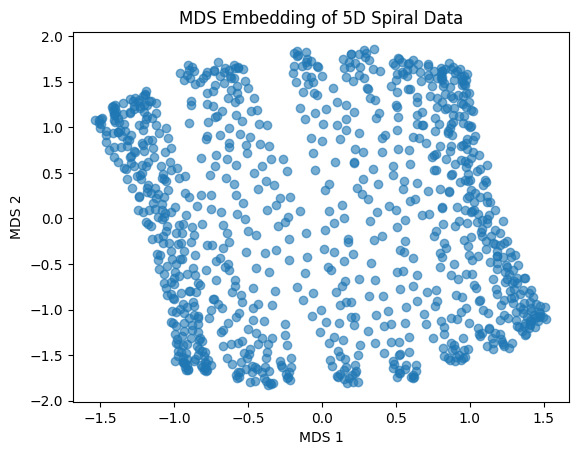

In [6]:
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

# Initialize MDS
mds = MDS(n_components=2, random_state=42)

# Fit and transform the data
data_mds = mds.fit_transform(data)

# Plotting
plt.scatter(data_mds[:, 0], data_mds[:, 1], cmap='Spectral', alpha=0.6)
plt.title('MDS Embedding of 5D Spiral Data')
plt.xlabel('MDS 1')
plt.ylabel('MDS 2')
plt.show()
